In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)

Features Shape: (150, 4)
Target Shape: (150,)


In [ ]:
# Decision Tree with fixed random_state
dt = DecisionTreeClassifier(random_state=42)

# 5-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


Fold 1 Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



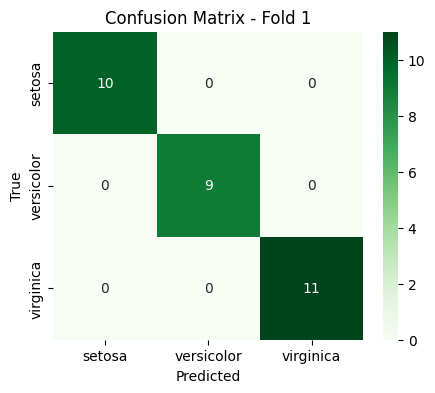

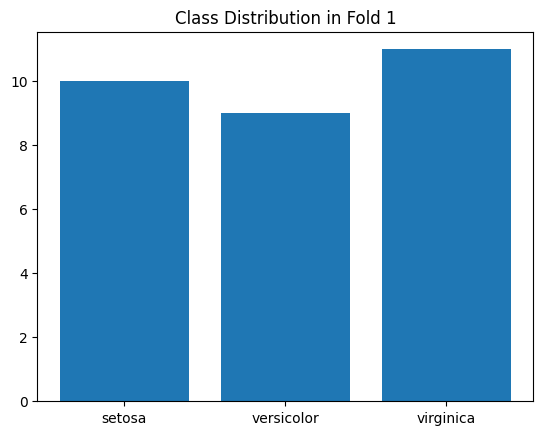


Fold 2 Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



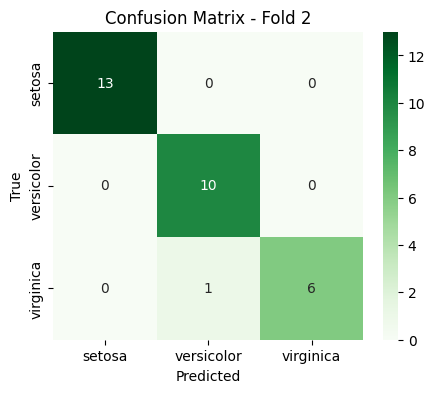

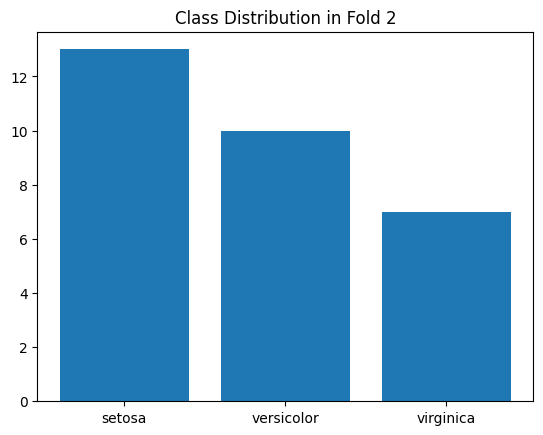


Fold 3 Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.80      0.89        10
   virginica       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30



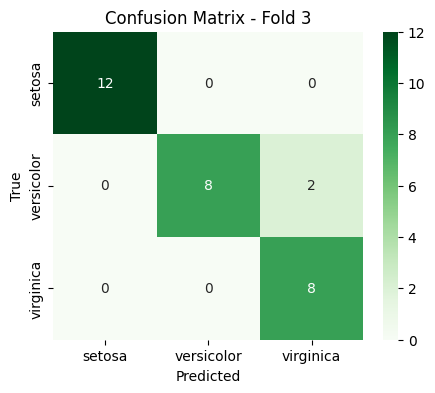

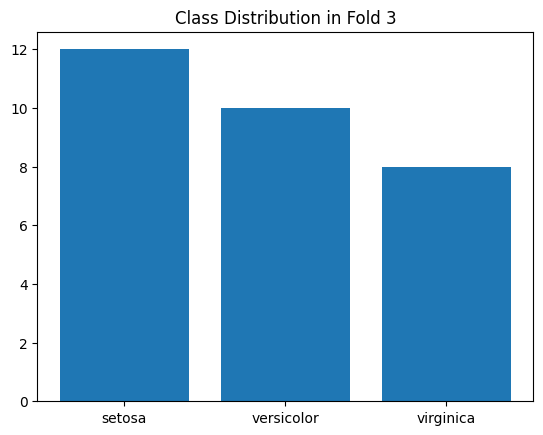


Fold 4 Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.90      0.90      0.90        10
   virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



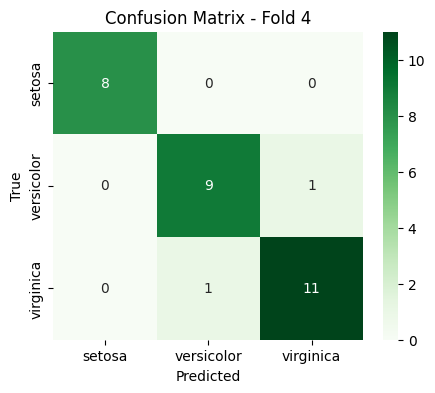

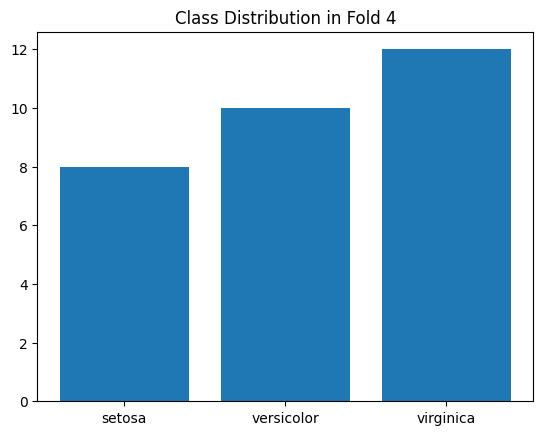


Fold 5 Results:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



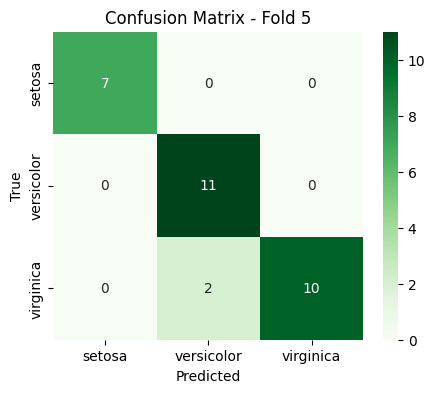

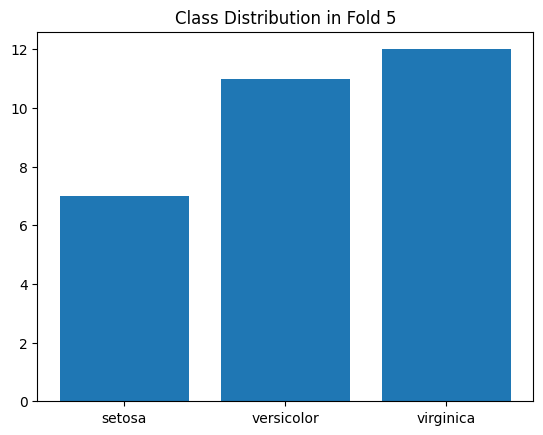

In [ ]:
# Store metrics
acc_scores, prec_scores, rec_scores, f1_scores = [], [], [], []

fold = 1
for train_index, test_index in kf.split(X):
    # Split
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    acc_scores.append(acc)
    prec_scores.append(prec)
    rec_scores.append(rec)
    f1_scores.append(f1)

    print(f"\nFold {fold} Results:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Greens", xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    # Class distribution in test set
    unique, counts = np.unique(y_test, return_counts=True)
    plt.bar(class_names[unique], counts)
    plt.title(f"Class Distribution in Fold {fold}")
    plt.show()

    fold += 1

In [ ]:
print("\nAverage Performance Across Folds:")
print("Accuracy:", np.mean(acc_scores))
print("Precision:", np.mean(prec_scores))
print("Recall:", np.mean(rec_scores))
print("F1-score:", np.mean(f1_scores))


Average Performance Across Folds:
Accuracy: 0.9533333333333335
Precision: 0.9581274281274281
Recall: 0.9538095238095238
F1-score: 0.9530439930439931


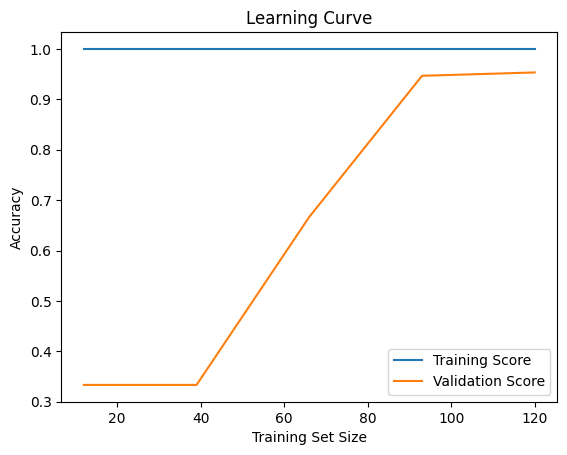

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, scoring='accuracy')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Validation Score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve")
plt.show()